In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import ttest_ind, f_oneway, levene, shapiro, kruskal, chi2_contingency, pearson3


In [47]:
df = pd.read_csv('yulu.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [128]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [48]:
df.shape

(10886, 12)

In [49]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [50]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Type Conversion

In [155]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['season'] = df['season'].astype('category')
df['weather'] = df['weather'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')

Univariate Analysis

In [167]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
len(num_cols)

7

In [173]:
num_cols

Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')

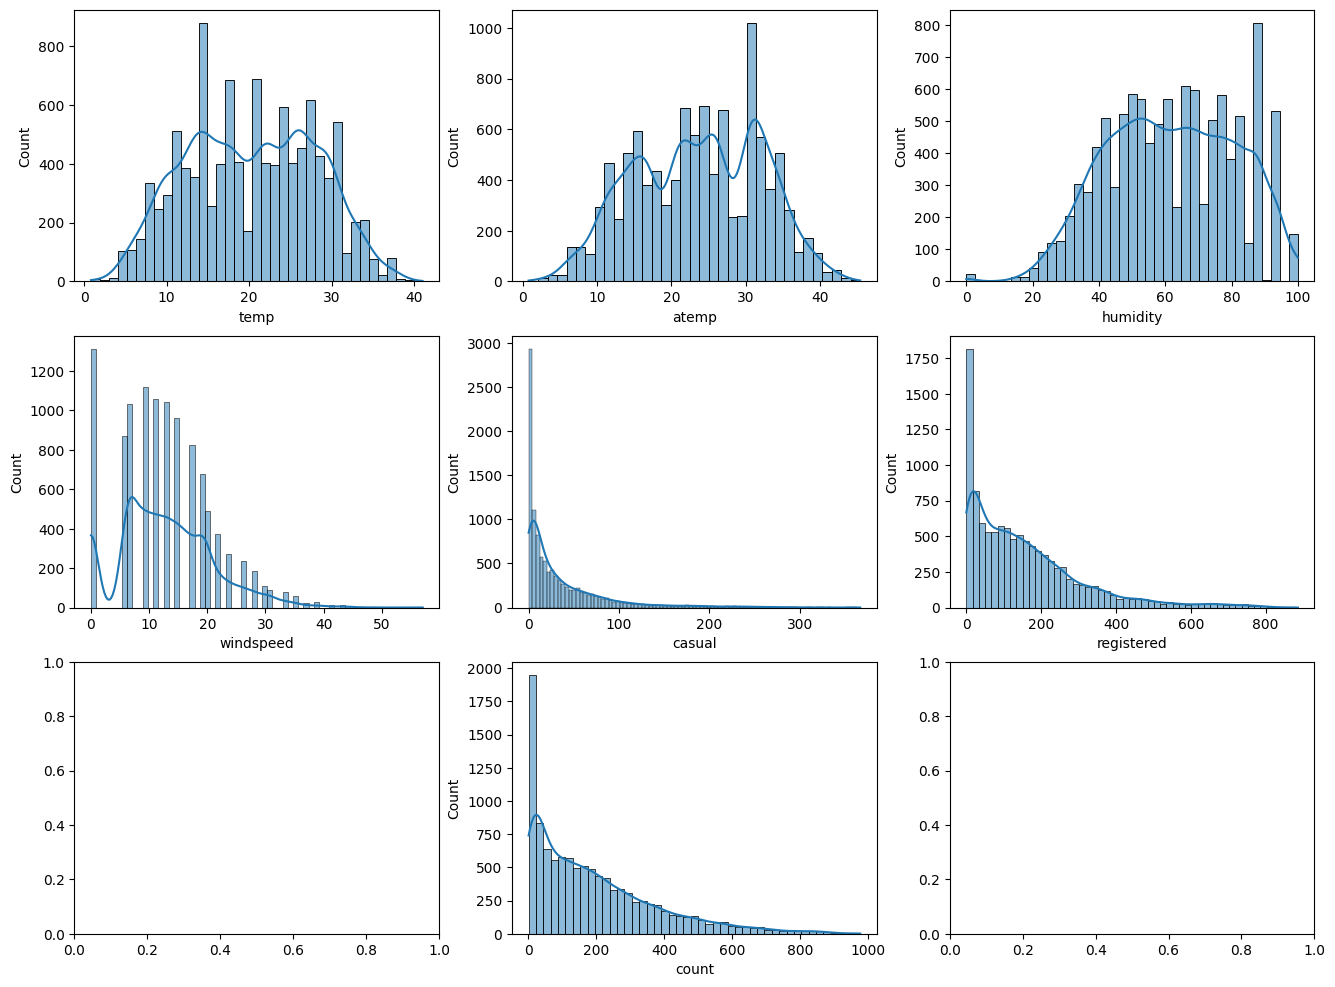

In [186]:
fig, ax = plt.subplots(nrows =3, ncols = 3, figsize=(16,12))
ind = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[ind]], ax=ax[row, col], kde=True)
        ind+=1
sns.histplot(df[num_cols[ind]], ax=ax[2,1], kde=True)
plt.show()

Count, Casual & Registered follows a Log Normal Distribution



Evrything else follows a normal distribution

<Axes: xlabel='workingday', ylabel='count'>

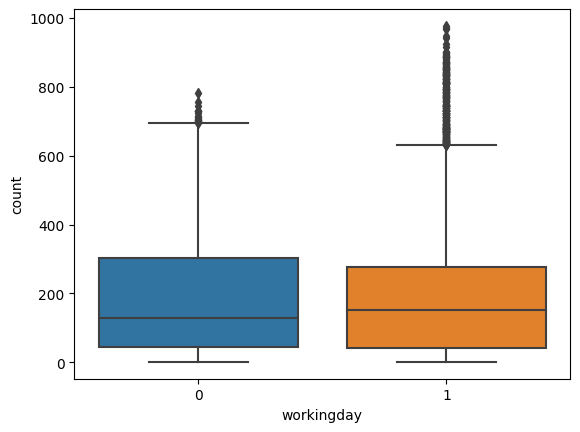

In [51]:
sns.boxplot(data = df, x = 'workingday', y = 'count')

In [125]:
df.groupby(['workingday'])['casual'].sum()

workingday
0    206037
1    186098
Name: casual, dtype: int64

In [126]:
df.groupby(['workingday'])['registered'].sum()

workingday
0     448835
1    1244506
Name: registered, dtype: int64

In [58]:
weekend = df[df['workingday'] == 0]['count'].sample(3422)
weekday = df[df['workingday'] == 1]['count'].sample(3422)

In [59]:
np.std(weekday), np.std(weekend)

(185.48167492610938, 173.11567348148486)

In [60]:
sig = 0.05

H0 : Bike renting is same on weekend and weekdays.
Ha : Bike renting on weekday is more than weekend.

In [61]:
_, p_val_t = ttest_ind(weekday, weekend, equal_var= False, alternative= 'greater')
p_val_t

0.08026354109087029

In [62]:
if p_val_t > sig:
    print(f'Failed to reject H0 as p-value is {p_val_t}')
else:
    print(f'Reject H0 as p-value is {p_val_t}')

Failed to reject H0 as p-value is 0.08026354109087029


Bike renting is same on weekend and weekdays.

Demand on different weather

In [64]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

Can elminate "4" as there are less samples

In [68]:
w1 = df[df['weather'] == 1]['count'].sample(850)
w2 = df[df['weather'] == 2]['count'].sample(850)
w3 = df[df['weather'] == 3]['count'].sample(850)

As there are more than 3 samples, using Annova, if prerequisites are followed.

In [69]:
H0 = 'Weather has no effect on Renting and mean is equal'
Ha = 'Weather has effect on Renting and mean is diffrent'

Levene to check Variance

In [77]:
if (levene(w1, w2, w3)[1]) > sig:
    print('All groups have same Variance')
else:
    print('Groups have different Variances')

Groups have different Variances


Shapiro test to check Distribution is Normal or not

In [83]:
print(f'p-value is {shapiro(df["count"].sample(5000))[1]}')

p-value is 0.0


Not a normal distribution

C:\Users\prave\AppData\Local\Temp\ipykernel_7912\3844318863.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['count'], shade = True, color= 'blue')


<Axes: xlabel='count', ylabel='Density'>

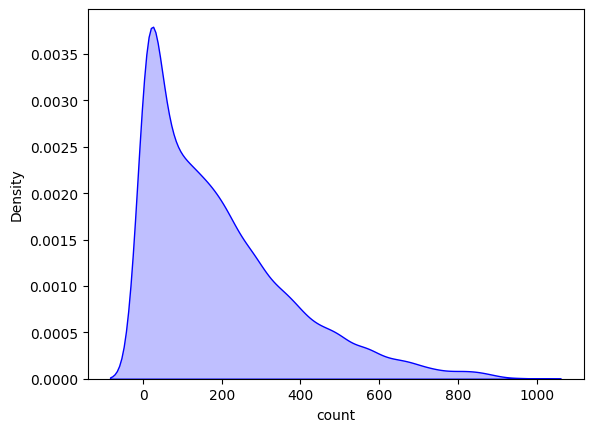

In [79]:
sns.kdeplot(data=df['count'], shade = True, color= 'blue')

In [149]:
_,p_val_ann = f_oneway(w1, w2, w3)
p_val_ann > sig

False

In [151]:
if p_val_ann > sig:
    print(f'Failed to reject null hypothesis i.e {H0} as p-value is {p_val_ann}')

else:
    print(f'Reject null hypothesis and can conclude {Ha}, as p-value is {p_val_ann}')

Reject null hypothesis and can conclude Season has effect on Renting and mean is diffrent, as p-value is 4.135947964108378e-25


In [87]:
kruskal(w1, w2, w3)

KruskalResult(statistic=112.97384295733413, pvalue=2.9379317464471895e-25)

In [88]:
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

Relation between Season and Renting

In [89]:
s1 = df[df['season'] == 1]['count'].sample(2650)
s2 = df[df['season'] == 2]['count'].sample(2650)
s3 = df[df['season'] == 3]['count'].sample(2650)
s4 = df[df['season'] == 4]['count'].sample(2650)

In [90]:
H0 = 'Season has no effect on Renting and mean is equal'
Ha = 'Season has effect on Renting and mean is diffrent'

Variance Check

In [92]:
levene(s1, s2, s3, s4)[1] > sig

False

Variance is different & Distribution is not noraml so going for a non-parmetric test i.e kruskal

In [152]:
print(f'{Ha} as p-value is {kruskal(s1, s2, s3, s4)[1]}')

Season has effect on Renting and mean is diffrent as p-value is 1.7195201374741706e-150


Weather vs Season

H0 : Weather is Independent of Season




Ha: Weather is dependent of Season

In [96]:
pd.crosstab(df['season'], df['weather'])

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


Elminating Weather - 4 as its frequency is less & chi-square needs greater than or equal to 1 frequency.

In [105]:
c_tab = pd.crosstab(df['season'], df[~(df['weather'] == 4)]['weather'])

In [112]:
print(f'p-value of {chi2_contingency(c_tab)[1]} concludes that there is a dependency between Season & Weather')

p-value of 2.8260014509929343e-08 concludes that there is a dependency between Season & Weather


Bucketing based on Temperature

In [129]:
func = lambda x : '0 - 10' if 0 <= x <=10 else('11 - 20' if 11<= x <=20 else('21 - 30' if 21 <= x <=30 else('31 - 40' if 31 <= x <=40 else '40+')))

In [130]:
df['temp_range'] = df['temp'].apply(func)

In [142]:
df['temp_range'].value_counts()

temp_range
21 - 30    4007
11 - 20    3717
0 - 10     1259
40+         959
31 - 40     944
Name: count, dtype: int64

taking maximum sample size as 900

In [143]:
t0 =  df[df['temp_range'] == '0 - 10']['count'].sample(900)
t11 = df[df['temp_range'] == '11 - 20']['count'].sample(900)
t21 = df[df['temp_range'] == '21 - 30']['count'].sample(900)
t31 = df[df['temp_range'] == '31 - 40']['count'].sample(900)
t40 = df[df['temp_range'] == '40+']['count'].sample(900)

H0 : Temperature has no effect on Booking & Mean is same.



Ha : Temperature has an effect on Booking & Means are different.

In [144]:
levene(t0, t11, t21, t31, t40)

LeveneResult(statistic=97.30340275711646, pvalue=1.5831725725233685e-79)

Failed to use Annova going for kruskal - wallis or Wilcoxon test

In [153]:
print(f'There is an effect of temperature on Booking as p-value {kruskal(t0, t11, t21, t31, t40)[1]} very low than significane.\nWe can accept Alternate Hypothesis ')

There is an effect of temperature on Booking as p-value 1.2888228204758807e-263 very low than significane.
We can accept Alternate Hypothesis 


Correlation between temperature and Booking